In [14]:
# Impoting Necessary Liberary

import tensorflow
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import os
import json
import sklearn
import pickle
from sklearn.model_selection import train_test_split
import random
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
# Retriving data from Folder and Making a DataFrame out of It

curr_dir = os.getcwd()
data = []

with open(curr_dir + r'\LSTM_dataset\News_Category_Dataset_v3.json', 'r') as f:
    for line in f:
        content = json.loads(line)
        data.append(content)
news_data = pd.DataFrame(data=data)
news_data.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [18]:
# Set the size of Dataset  -- set number according to PC speed more data more training time 

dataset_size = 20000
news_data = news_data.head(dataset_size)

In [19]:
# No of Columns our DataFrame Consist

news_data.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [20]:
# Converting the short_description Series into a List

description = news_data['short_description'].tolist()
description

['Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.',
 "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",
 '"Until you have a dog you don\'t understand what could be eaten."',
 '"Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."',
 'Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.',
 'The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.',
 '"Who\'s that behind you?" an anchor for New York’s PIX11 asked journalist Michelle Ross as she finished up an int

In [21]:
# Making function that Removing starting and end spaces and Removing unnecessary data such as @#$ 

import re

def clean_text(data):
    output = []
    for text in data:
        text = text.lower()
        text = re.sub(r',', '', text)
        text = re.sub(r'\'', '',  text)
        text = re.sub(r'\"', '', text)
        text = re.sub(r'\(', '', text)
        text = re.sub(r'\)', '', text)
        text = re.sub(r'\n', '', text)
        text = re.sub(r'“', '', text)
        text = re.sub(r'”', '', text)
        text = re.sub(r'’', '', text)
        text = re.sub(r'\.', '', text)
        text = re.sub(r';', '', text)
        text = re.sub(r':', '', text)
        text = re.sub(r'\-', '', text)
        output.append(text)
    return output

In [22]:
# Applying the function and doing DataCleaning 

description = clean_text(description)
df_text = pd.DataFrame({'description': description})
description

['health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the us ordered for the fall',
 'he was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation according to the us attorneys office in los angeles',
 'until you have a dog you dont understand what could be eaten',
 'accidentally put grownup toothpaste on my toddlers toothbrush and he screamed like i was cleaning his teeth with a carolina reaper dipped in tabasco sauce',
 'amy cooper accused investment firm franklin templeton of unfairly firing her and branding her a racist after video of the central park encounter went viral',
 'the 63yearold woman was seen working at the south carolina store on thursday she was found dead monday after her family reported her missing authorities said',
 'whos that behind you? an anchor for new yorks pix11 asked journalist michelle ross as she finished up an interview',
 'more than half a m

In [23]:
# Tokenizing the Sentence 

from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# This Fucntion takes Dictionary as a input with some Size as Int and Return the dictionary of that size 
# It is use to show some elements of Dictionary

def dictionary_items_ex(dic, value=5):
    temp = {}
    for i in dic:
        temp[i] = dic[i]
        if dic[i] == value:
            break
    return temp

# Instantiating the Tokenizer
tokenizer = Tokenizer()
# Token size defining
vocab_size = 10000
tokenizer.num_words = vocab_size
tokenizer.fit_on_texts(description)
train_sequences = tokenizer.texts_to_sequences(description)
word_index = tokenizer.word_index
num_category = news_data.category.nunique()
print(f'Total no of new Category : {num_category}')
print('Found %s unique tokens.' % len(word_index))
print('1st token-id sequnce :', train_sequences[0])
print('Example : ', dictionary_items_ex(word_index))

Total no of new Category : 36
Found 26125 unique tokens.
1st token-id sequnce : [149, 329, 10, 15, 8, 152, 523, 2, 4933, 330, 1505, 65, 2335, 52, 13, 1, 196, 4049, 4, 1, 33, 1, 42, 1278, 7, 1, 868]
Example :  {'the': 1, 'to': 2, 'a': 3, 'of': 4, 'and': 5}


In [25]:
# Saving the Pickle File into The Current Directory

import pickle

with open('LSTM_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Getitng the Tokenizer configuration

# tokenizer.get_config()

In [27]:
# Making the DataFrame of our unique Token Corresponding to Its Toekn name

df_index_word = pd.Series(tokenizer.index_word).reset_index()
df_index_word.columns=['token_index','token']
df_index_word.head(5)

,token_index,token
0,1,the
1,2,to
2,3,a
3,4,of
4,5,and


In [28]:
# Token DataFrame Size 

df_index_word.shape

(26125, 2)

In [29]:
# Visulization of Total no of Words Containing that Same Token 

df_token_by_count = pd.DataFrame(tokenizer.word_counts.items())
df_token_by_count.columns=['token', 'count']
df_token_by_count = pd.merge(df_index_word, df_token_by_count,
                            on='token',
                            how='left')
df_token_by_count.head()

,token_index,token,count
0,1,the,21201
1,2,to,8100
2,3,a,8053
3,4,of,6846
4,5,and,5584


In [30]:
# compare the number of tokens and tokens after cut-off
train_sequences = tokenizer.texts_to_sequences(description) #Converting text to a vector of word indexes
# print(len(text_to_word_sequence(raw_text[0])), len(train_sequences[0]))
print(description[0])
print(text_to_word_sequence(description[0]))
print()
tokenizer.num_words = None # take all the tokens
print(tokenizer.texts_to_sequences(description)[0])
tokenizer.num_words = 50 # take the top 50-1 tokens
print(tokenizer.texts_to_sequences(description)[0])

health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the us ordered for the fall
['health', 'experts', 'said', 'it', 'is', 'too', 'early', 'to', 'predict', 'whether', 'demand', 'would', 'match', 'up', 'with', 'the', '171', 'million', 'doses', 'of', 'the', 'new', 'boosters', 'the', 'us', 'ordered', 'for', 'the', 'fall']

[149, 329, 10, 15, 8, 152, 523, 2, 4933, 330, 1505, 65, 2335, 52, 13, 1, 13439, 196, 4049, 4, 1, 33, 13440, 1, 42, 1278, 7, 1, 868]
[10, 15, 8, 2, 13, 1, 4, 1, 33, 1, 42, 7, 1]


In [31]:
# Making A np.Array of Token corresponding to its token name 

df_word_index = pd.Series(word_index).reset_index()
df_word_index.columns=['token','token_index']
# df_word_index
df_check = pd.merge(pd.DataFrame({'token_index':train_sequences[0]}),
        df_word_index,
        on='token_index',
        how='left')
df_check.values

array([[149, 'health'],
       [329, 'experts'],
       [10, 'said'],
       [15, 'it'],
       [8, 'is'],
       [152, 'too'],
       [523, 'early'],
       [2, 'to'],
       [4933, 'predict'],
       [330, 'whether'],
       [1505, 'demand'],
       [65, 'would'],
       [2335, 'match'],
       [52, 'up'],
       [13, 'with'],
       [1, 'the'],
       [196, 'million'],
       [4049, 'doses'],
       [4, 'of'],
       [1, 'the'],
       [33, 'new'],
       [1, 'the'],
       [42, 'us'],
       [1278, 'ordered'],
       [7, 'for'],
       [1, 'the'],
       [868, 'fall']], dtype=object)

In [32]:
# Adding the Tokenized Sentence into the df_text 

df_text['token_sequence'] = df_text.description.apply(lambda x: tokenizer.texts_to_sequences([x])[0])
df_text.head()

,description,token_sequence
0,health experts said it is too early to predict...,"[10, 15, 8, 2, 13, 1, 4, 1, 33, 1, 42, 7, 1]"
1,he was subdued by passengers and crew when he ...,"[17, 12, 31, 5, 17, 2, 1, 4, 1, 37, 1, 2, 1, 4..."
2,until you have a dog you dont understand what ...,"[36, 21, 3, 36, 25]"
3,accidentally put grownup toothpaste on my todd...,"[9, 5, 17, 28, 12, 14, 13, 3, 6]"
4,amy cooper accused investment firm franklin te...,"[4, 32, 5, 32, 3, 37, 4, 1]"


In [33]:
# Exmaple of Sentence Before and After Toeknization

print(df_text.description[0])
print(df_text.token_sequence[0])

health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the us ordered for the fall
[10, 15, 8, 2, 13, 1, 4, 1, 33, 1, 42, 7, 1]


Average_length mean:  91.9755
sequence_length mean:  5.54665
sequence_length median:  5.0


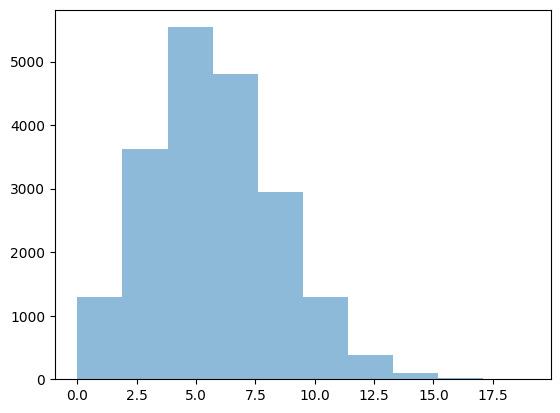

In [34]:
# Making a BarPlot for Visulization of Average Toeknized Sentence Lenght 

from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt 

length_check = df_text.token_sequence.apply(lambda x: len(x))
avg_len = df_text.description.apply(lambda x: len(x))
print('Average_length mean: ', avg_len.mean())
print('sequence_length mean: ', length_check.mean())
print('sequence_length median: ', length_check.median())
plt.hist(length_check, alpha=0.5, label='x')
plt.show()

In [35]:
# Padding on the Tokenized Sentence and Adding in the DataFrame

MAX_SEQUENCE_LENGTH = 10 # length of the sequence
df_text['padding'] = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                                padding='pre',
                                truncating='pre',).tolist()
df_text

,description,token_sequence,padding
0,health experts said it is too early to predict...,"[10, 15, 8, 2, 13, 1, 4, 1, 33, 1, 42, 7, 1]","[4049, 4, 1, 33, 1, 42, 1278, 7, 1, 868]"
1,he was subdued by passengers and crew when he ...,"[17, 12, 31, 5, 17, 2, 1, 4, 1, 37, 1, 2, 1, 4...","[4050, 220, 2, 1, 42, 2017, 231, 6, 917, 1015]"
2,until you have a dog you dont understand what ...,"[36, 21, 3, 36, 25]","[21, 3, 1279, 36, 97, 1454, 55, 79, 25, 7655]"
3,accidentally put grownup toothpaste on my todd...,"[9, 5, 17, 28, 12, 14, 13, 3, 6]","[12, 3738, 14, 3185, 13, 3, 1016, 9595, 6, 7656]"
4,amy cooper accused investment firm franklin te...,"[4, 32, 5, 32, 3, 37, 4, 1]","[717, 37, 190, 4, 1, 1189, 764, 2336, 318, 749]"
...,...,...,...
19995,he and his wife grace would be granted full im...,"[17, 5, 14, 25, 17]","[5459, 65, 25, 3679, 559, 4830, 64, 17, 2408, ..."
19996,transition is the name of the game in the midd...,"[8, 1, 4, 1, 6, 1, 5, 1, 8, 2, 1]","[5, 275, 2071, 1, 503, 8, 2667, 2, 55, 1]"
19997,the breakdown of coalition talks has plunged g...,"[1, 4, 20, 3]","[815, 20, 6731, 1774, 656, 69, 3, 1663, 227, 536]"
19998,in a major thorough and truly important piece ...,"[6, 3, 5, 4, 5]","[2000, 4, 9553, 1846, 2303, 6417, 5337, 7644, ..."


In [36]:
# Extraction Total No of Unique Words_Vector The Downloaded Vectore File Contain

glove_path = curr_dir + r'\LSTM_dataset\glove.6B\glove.6B.100d.txt'

emb_index = {}
with open(glove_path, encoding="utf") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        emb_index[word] = coefs
        
print("Found %s word vectors." % len(emb_index))

Found 400001 word vectors.


In [37]:
# Applying the Vectorzer into the Every word of out Dataset words And Adding Converted Sentence Into the DataFrame

num_tokens = vocab_size
embedding_dim = 100
df_index_word['word2vec'] = df_index_word.token.apply(lambda x: emb_index[x] if x in emb_index else np.zeros((embedding_dim)))

In [38]:
# Visulization of how Our word Vector Look Like 

from tqdm import tqdm
embedding_matrix = np.array([vec for vec in tqdm(df_index_word.word2vec.values)])
embedding_matrix

100%|███████████████████████████████████████████████████████████████████████| 26125/26125 [00:00<00:00, 3724421.06it/s]


array([[-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       [-0.27085999,  0.044006  , -0.02026   , ..., -0.4923    ,
         0.63687003,  0.23642001],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14284   ,  0.28081   ,  0.98118001, ..., -0.36098   ,
         0.052126  ,  1.07780004]])

In [39]:
# Visulization of Our DataFrame 

df_index_word

,token_index,token,word2vec
0,1,the,"[-0.038194, -0.24487, 0.72812, -0.39961, 0.083..."
1,2,to,"[-0.1897, 0.050024, 0.19084, -0.049184, -0.089..."
2,3,a,"[-0.27086, 0.044006, -0.02026, -0.17395, 0.644..."
3,4,of,"[-0.1529, -0.24279, 0.89837, 0.16996, 0.53516,..."
4,5,and,"[-0.071953, 0.23127, 0.023731, -0.50638, 0.339..."
...,...,...,...
26120,26121,unsentimental,"[-0.073477, 0.41102, 0.53399, 0.43978, -0.2086..."
26121,26122,rendering,"[-0.30166, 0.33186, 0.29584, 0.32193, 0.086386..."
26122,26123,omie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
26123,26124,roems,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [40]:
# Inilization of Our Embedding Layer 

from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Embedding

MAX_NUM_TOKENS = vocab_size

# MAX_NUM_TOKENS = 20000
EMBEDDING_DIM = embedding_matrix.shape[1]
# MAX_SEQUENCE_LENGTH = 10
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
                            output_dim=EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            mask_zero=True,
                            trainable=False)

In [41]:
# Converting the sentence by Embedding Layer  

pad_sequences = np.array([x for x in tqdm(df_text.padding.values)])
embedding_output = embedding_layer(pad_sequences)
print(pad_sequences.shape)
embedding_output.shape

100%|███████████████████████████████████████████████████████████████████████| 20000/20000 [00:00<00:00, 3999527.03it/s]

(20000, 10)


TensorShape([20000, 10, 100])

In [42]:
# Converting the DataType into Numpy Array

padding_matrix = np.array(df_text.padding.tolist())
padding_matrix

array([[4049,    4,    1, ...,    7,    1,  868],
       [4050,  220,    2, ...,    6,  917, 1015],
       [  21,    3, 1279, ...,   79,   25, 7655],
       ...,
       [ 815,   20, 6731, ..., 1663,  227,  536],
       [2000,    4, 9553, ..., 7644,    5,  295],
       [  15,   59, 2219, ...,  529,  340,   11]])

In [43]:
xs = padding_matrix[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = padding_matrix[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[4049    4    1 ... 1278    7    1]
 [4050  220    2 ...  231    6  917]
 [  21    3 1279 ...   55   79   25]
 ...
 [ 815   20 6731 ...    3 1663  227]
 [2000    4 9553 ... 5337 7644    5]
 [  15   59 2219 ... 3725  529  340]]
labels: [ 868 1015 7655 ...  536  295   11]


In [44]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys.shape)

(20000, 10000)


In [45]:
# Splitting the Dataset into training and testing which size of 80 : 20

x_train, y_train, x_val , y_val = train_test_split(xs, ys, train_size=0.80)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(16000, 9)
(16000, 10000)
(4000, 9)
(4000, 10000)


In [46]:
# Inilization of our Batch Size and making tensor Slices of that batch size

batch_size = 16

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_val))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((y_train, y_val))
val_dataset = val_dataset.batch(batch_size)

In [47]:
# Seeing Whether your Pc Contain GPU or Not 

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [48]:
# Inilization of out Model it is BiDirectional LSTM Model with Self-Attention Layer 

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D, Attention
from tensorflow.keras.models import Model, model_from_json
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import keras

# using the functional APIs of keras to define the model

i = Input(shape=(MAX_SEQUENCE_LENGTH-1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, embedding_dim, input_length=MAX_SEQUENCE_LENGTH-1)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = SeqSelfAttention(attention_activation='sigmoid',
                       name='Attention')(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = SeqSelfAttention(attention_activation='sigmoid',
                       name='Attention_2')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 9, 100)            1000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 100)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 9, 520)            1291680   
_________________________________________________________________
Attention (SeqSelfAttention) (None, 9, 520)            33345     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 9, 680)            2341920   
_________________________________________________________________
Attention_2 (SeqSelfAttentio (None, 9, 680)            4358

In [50]:
# Inilization of Callback for Saving the Model Certain Epoch 

SAVE_PERIOD = 50

checkpoint_path = curr_dir + '\LSTM_callback\LSTM-model-{epoch:02d}-{val_loss:.2f}.hdf5' 

# Create a callback that saves the model's weights every 50 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    monitor='loss',
    period =50,
    save_best_only=True)

In [51]:
# Making the Model Compiliation 

model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# If Your Already Trained it and want to reload the Weights into the Model your Can use this 

# import keras
# from keras_self_attention import SeqSelfAttention
# filename = r"C:\Users\ADMIN\Tution\Deep_learning\DL_project\LSTM_data\LSTM_Attention_10.h5"
# model.load_weights(filename)

In [ ]:
# Starting the training 

r = model.fit(train_dataset,
              epochs=200, 
              batch_size = 128,
              callbacks=cp_callback,
              validation_data=(val_dataset))

Epoch 1/200
1000/1000 [==============================] - 29s 24ms/step - loss: 3.0995 - accuracy: 0.7219 - val_loss: 2.7459 - val_accuracy: 0.7535
Epoch 2/200
1000/1000 [==============================] - 17s 17ms/step - loss: 1.7118 - accuracy: 0.7926 - val_loss: 2.9960 - val_accuracy: 0.6873
Epoch 3/200
1000/1000 [==============================] - 22s 22ms/step - loss: 1.0998 - accuracy: 0.8183 - val_loss: 3.7861 - val_accuracy: 0.6288
Epoch 4/200
1000/1000 [==============================] - 19s 19ms/step - loss: 0.6585 - accuracy: 0.8661 - val_loss: 4.4857 - val_accuracy: 0.5785
Epoch 5/200
1000/1000 [==============================] - 20s 20ms/step - loss: 0.3731 - accuracy: 0.9154 - val_loss: 5.3205 - val_accuracy: 0.5642
Epoch 6/200
1000/1000 [==============================] - 19s 19ms/step - loss: 0.2322 - accuracy: 0.9413 - val_loss: 5.6912 - val_accuracy: 0.5472
Epoch 7/200
1000/1000 [==============================] - 22s 22ms/step - loss: 0.1606 - accuracy: 0.9587 - val_loss: 6

Epoch 109/200
1000/1000 [==============================] - 23s 23ms/step - loss: 0.0551 - accuracy: 0.9851 - val_loss: 14.0771 - val_accuracy: 0.2635
Epoch 110/200
 806/1000 [=======================>......] - ETA: 4s - loss: 0.0584 - accuracy: 0.98

In [ ]:
# Plotting the loss and val_accuracy Graph

plt.plot(r.history.history["loss"], label="training accuracy")
plt.plot(r.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
# Plotting the Accuracy and val_accuracy Graph

plt.plot(model.history.history["accuracy"], label="training accuracy")
plt.plot(model.history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [1]:
# Saving the Model into the Directory

# To Save Model Weights
# model.save_weights(curr_dir + "/LSTM_Attention2_10.h5")


# To save whole Model
model.save(model, "LSTM_Attention4_10")


print("Saved model to disk")

In [8]:
# Loading the Saved Model back

model = tensorflow.keras.models.load_model('LSTM_Attention3_10.h5', custom_objects=SeqSelfAttention.get_custom_objects())

In [15]:
# Loading the Tokenizer 

with open('LSTM_tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [16]:
# Making Function that Take the User Sentence and the output Length and return the Predicted Output

def predict_words(seed, no_words=15):
    for i in range(no_words):
        token_list = tokenizer.texts_to_sequences([seed])[0]
        token_list = pad_sequences([token_list], maxlen=9, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=1)

        new_word = ''

        for word, index in tokenizer.word_index.items():
            if predicted == index:
                new_word = word
                break
        seed += " " + new_word
    return seed

In [17]:
# Example of our Model output

text = "trump govermente was in"
sentence_size = 15
model_output = predict_words(text, sentence_size)
print(model_output)

trump govermente was in development parkland either he morning treat crazy september treat cash supply species tough questions step
